In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# read x.csv file 
dfx = pd.read_csv('csv_files/x.csv', index_col=0)
dfx.head()

,C1,C2,C3,C4,C5,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3,C3p,C5p,C6p
0,122.0,1.0,3.43,0.029074,40962052.0,10600000.0,51.345,470.0,12719.0,11560.0,301.0,690.0,62.0,117.0,139.0,0,3.864345,11.111111
1,259.0,0.0,-1.62,-0.013352,28869196.0,2400000.0,25.936,791.0,21792.0,19585.0,510.0,1120.0,71.0,242.0,237.0,1,12.028832,0.000000
2,90.0,1.0,-1.24,0.020715,16845668.0,5000000.0,7.378,201.0,5262.0,4785.0,128.0,325.0,61.0,33.0,60.0,1,3.369134,0.000000
3,209.0,1.0,-0.91,0.020023,14848637.0,4500000.0,8.526,328.0,8259.0,7574.0,177.0,509.0,80.0,59.0,110.0,1,3.299697,0.000000
4,80.0,1.0,0.07,-0.034895,30741716.0,8250000.0,632.298,572.0,14830.0,13176.0,336.0,720.0,67.0,149.0,167.0,0,3.726269,5.000000


In [3]:
# create separate dataframe for C2 as we do not need to change any outliers because it is a binary variable
# will concat this df with dfx dataframe later 
dfc2 = pd.DataFrame(dfx['C2'])
dfc2.head()

,C2
0,1.0
1,0.0
2,1.0
3,1.0
4,1.0


In [4]:
# drop column C2 from main dfx dataframe
dfx = dfx.drop(labels='C2', axis=1)
dfx.head()

,C1,C3,C4,C5,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3,C3p,C5p,C6p
0,122.0,3.43,0.029074,40962052.0,10600000.0,51.345,470.0,12719.0,11560.0,301.0,690.0,62.0,117.0,139.0,0,3.864345,11.111111
1,259.0,-1.62,-0.013352,28869196.0,2400000.0,25.936,791.0,21792.0,19585.0,510.0,1120.0,71.0,242.0,237.0,1,12.028832,0.000000
2,90.0,-1.24,0.020715,16845668.0,5000000.0,7.378,201.0,5262.0,4785.0,128.0,325.0,61.0,33.0,60.0,1,3.369134,0.000000
3,209.0,-0.91,0.020023,14848637.0,4500000.0,8.526,328.0,8259.0,7574.0,177.0,509.0,80.0,59.0,110.0,1,3.299697,0.000000
4,80.0,0.07,-0.034895,30741716.0,8250000.0,632.298,572.0,14830.0,13176.0,336.0,720.0,67.0,149.0,167.0,0,3.726269,5.000000


In [5]:
# finding IQR for each variable 
Q1 = dfx.quantile(0.25)
Q3 = dfx.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

C1     6.775000e+01
C3     1.350000e+00
C4     4.429223e-02
C5     3.063502e+07
C6     7.083029e+06
C7     4.589485e+02
T1     1.995000e+02
T2     6.044500e+03
T3     5.583500e+03
T4     1.405000e+02
T5     3.322500e+02
S1     3.975000e+01
S2     6.875000e+01
S3     7.300000e+01
C3p    1.000000e+00
C5p    2.011641e+00
C6p    7.142857e+00
dtype: float64


In [6]:
# print out Q1 and Q3 values for each variable 
print('Q1 Values')
print(Q1)
print('Q3 Values')
print(Q3)

Q1 Values
C1     8.500000e+01
C3    -7.500000e-01
C4    -1.335164e-02
C5     1.874682e+07
C6     5.004180e+06
C7     4.151150e+01
T1     3.512500e+02
T2     9.195750e+03
T3     8.168000e+03
T4     2.132500e+02
T5     4.622500e+02
S1     4.500000e+01
S2     7.300000e+01
S3     1.000000e+02
C3p    0.000000e+00
C5p    2.853439e+00
C6p    0.000000e+00
Name: 0.25, dtype: float64
Q3 Values
C1     1.527500e+02
C3     6.000000e-01
C4     3.094059e-02
C5     4.938184e+07
C6     1.208721e+07
C7     5.004600e+02
T1     5.507500e+02
T2     1.524025e+04
T3     1.375150e+04
T4     3.537500e+02
T5     7.945000e+02
S1     8.475000e+01
S2     1.417500e+02
S3     1.730000e+02
C3p    1.000000e+00
C5p    4.865080e+00
C6p    7.142857e+00
Name: 0.75, dtype: float64


In [7]:
# identifying outlier value locations sort of 
# Q1 - 1.5 * IQR = lower bound 
# Q3 + 1.5 * IQR = upper bound 

# define upper bound
upper = Q3 + 1.5 * IQR
# define lower bound 
lower = Q1 - 1.5 * IQR
# define outlier variable 
# below is equivalent to this formula: outlier = (dfx < (Q1 - 1.5 * IQR)) | (dfx > (Q3 + 1.5 * IQR))
outlier = (dfx < lower) | (dfx > upper)

# print out the results
# gives the location of the outlier values based on the bounds 
print(outlier)

        C1     C3     C4     C5     C6     C7     T1     T2     T3     T4  \
0    False   True  False  False  False  False  False  False  False  False   
1     True  False  False  False  False  False  False  False  False  False   
2    False  False  False  False  False  False  False  False  False  False   
3    False  False  False  False  False  False  False  False  False  False   
4    False  False  False  False  False  False  False  False  False  False   
5    False  False  False  False  False  False  False  False  False  False   
6    False  False  False  False  False  False  False  False  False  False   
7    False  False  False  False  False  False  False  False  False  False   
8    False  False  False  False  False  False  False  False  False  False   
9    False  False  False  False  False  False  False  False  False  False   
10   False  False  False  False  False  False  False  False  False  False   
11   False   True  False  False  False  False  False  False  False  False   

In [8]:
# print the upper bound value for each variable
print(upper)

C1     2.543750e+02
C3     2.625000e+00
C4     9.737893e-02
C5     9.533437e+07
C6     2.271175e+07
C7     1.188883e+03
T1     8.500000e+02
T2     2.430700e+04
T3     2.212675e+04
T4     5.645000e+02
T5     1.292875e+03
S1     1.443750e+02
S2     2.448750e+02
S3     2.825000e+02
C3p    2.500000e+00
C5p    7.882541e+00
C6p    1.785714e+01
dtype: float64


In [9]:
# print the lower bound for each variable 
print(lower)

C1    -1.662500e+01
C3    -2.775000e+00
C4    -7.978998e-02
C5    -2.720571e+07
C6    -5.620363e+06
C7    -6.469112e+02
T1     5.200000e+01
T2     1.290000e+02
T3    -2.072500e+02
T4     2.500000e+00
T5    -3.612500e+01
S1    -1.462500e+01
S2    -3.012500e+01
S3    -9.500000e+00
C3p   -1.500000e+00
C5p   -1.640217e-01
C6p   -1.071429e+01
dtype: float64


In [10]:
# define upper and lower lists
upper = []
lower = []

# create for loop that will iterate over each value in every column
for i in dfx.columns:
    # define Q1 and Q3 for each column
    Q1 = dfx[i].quantile(0.25)
    Q3 = dfx[i].quantile(0.75)
    # define IQR for each column
    IQR = Q3 - Q1
    # append empty lists upper and lower
    upper_list = Q3 + 1.5 * IQR
    upper.append(upper_list)
    lower_list = Q1 - 1.5 * IQR
    lower.append(lower_list)
    

In [11]:
# define the function that will replace outlier values in each column with the appropriate upper or lower limit 
def outlier_handling(x, upper, lower):
    if x > upper:
        x = upper
    elif x < lower:
            x = lower
    else:
        pass
    return x

In [12]:
# apply the outlier handling function to the dfx dataframe to replace the outlier values in each column
for col in dfx.columns:
    q1 = dfx.loc[:, col].quantile(0.25)
    q3 = dfx.loc[:, col].quantile(0.75)
    IQR = q3 - q1
    lbound = q1 - 1.5*IQR
    ubound = q3 + 1.5*IQR
    dfx.loc[:, col] = dfx.loc[:, col].apply(lambda x: outlier_handling(x, ubound,lbound))

### Check that the Outlier Handling function Worked
### Examine the boxplots for each variable 

{'whiskers': [<matplotlib.lines.Line2D at 0x7f1b3f042ba8>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1b3efd9278>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1b3f042a58>],
 'medians': [<matplotlib.lines.Line2D at 0x7f1b3efd9908>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f1b3efd9c50>],
 'means': []}

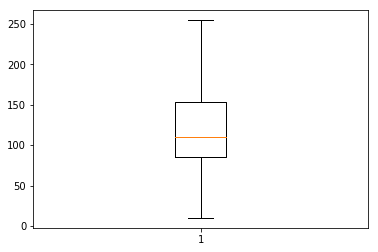

In [13]:
plt.boxplot(dfx['C1'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f1b3ef51470>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1b3ef51b00>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1b3ef51320>],
 'medians': [<matplotlib.lines.Line2D at 0x7f1b3ef591d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f1b3ef59518>],
 'means': []}

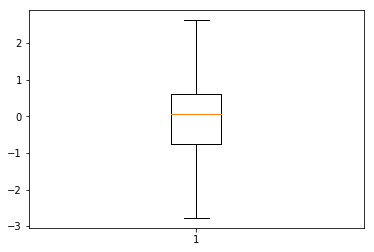

In [14]:
plt.boxplot(dfx['C3'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f1b3ef2cba8>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1b3ef34278>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1b3ef2ca58>],
 'medians': [<matplotlib.lines.Line2D at 0x7f1b3ef34908>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f1b3ef34c50>],
 'means': []}

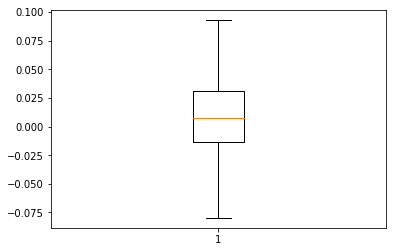

In [15]:
plt.boxplot(dfx['C4'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f1b3ef0cef0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1b3ee935c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1b3ef0cda0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f1b3ee93c50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f1b3ee93f98>],
 'means': []}

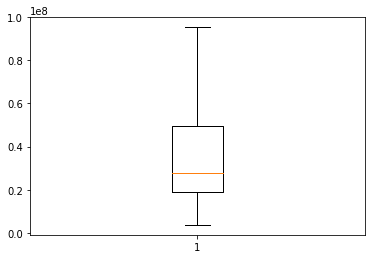

In [16]:
plt.boxplot(dfx['C5'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f1b3eecb1d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1b3eecb860>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1b3eecb080>],
 'medians': [<matplotlib.lines.Line2D at 0x7f1b3eecbef0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f1b3ee75278>],
 'means': []}

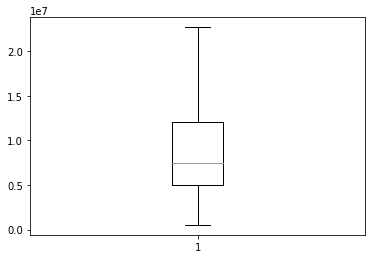

In [17]:
plt.boxplot(dfx['C6'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f1b3ee40358>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1b3ee409e8>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1b3ee40208>],
 'medians': [<matplotlib.lines.Line2D at 0x7f1b3ee4c0b8>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f1b3ee4c400>],
 'means': []}

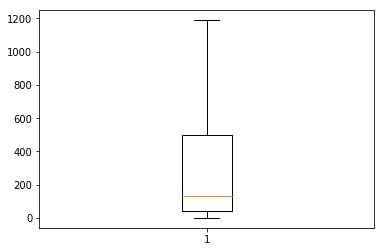

In [18]:
plt.boxplot(dfx['C7'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f1b4107c160>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1b4107c828>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1b4106be48>],
 'medians': [<matplotlib.lines.Line2D at 0x7f1b4107cef0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f1b4107d208>],
 'means': []}

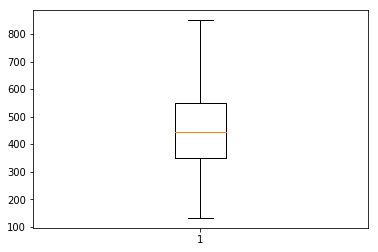

In [19]:
plt.boxplot(dfx['T1'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f1b3ed6ecf8>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1b3ed783c8>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1b3ed6eba8>],
 'medians': [<matplotlib.lines.Line2D at 0x7f1b3ed78a58>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f1b3ed78da0>],
 'means': []}

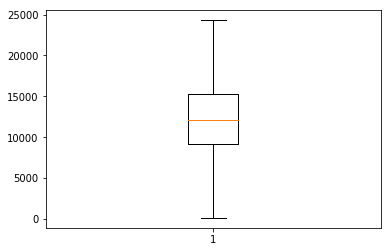

In [20]:
plt.boxplot(dfx['T2'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f1b3ed4c588>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1b3ed4cc18>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1b3ed4c438>],
 'medians': [<matplotlib.lines.Line2D at 0x7f1b3ed532e8>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f1b3ed53630>],
 'means': []}

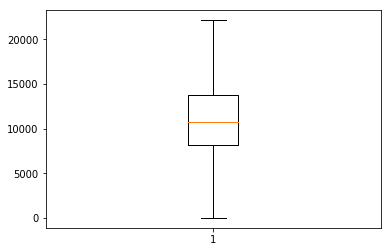

In [21]:
plt.boxplot(dfx['T3'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f1b3ec9d828>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1b3ec9deb8>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1b3ec9d6d8>],
 'medians': [<matplotlib.lines.Line2D at 0x7f1b3eca7588>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f1b3eca78d0>],
 'means': []}

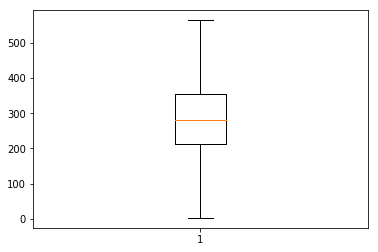

In [22]:
plt.boxplot(dfx['T4'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f1b3ec7b160>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1b3ec7b7f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1b3ec72fd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f1b3ec7be80>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f1b3ec85208>],
 'means': []}

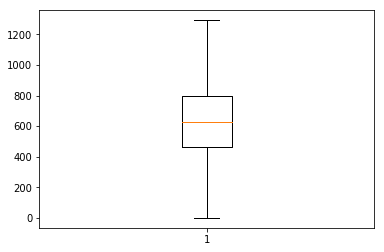

In [23]:
plt.boxplot(dfx['T5'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f1b3ec4dd68>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1b3ebd6438>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1b3ec4dc18>],
 'medians': [<matplotlib.lines.Line2D at 0x7f1b3ebd6ac8>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f1b3ebd6e10>],
 'means': []}

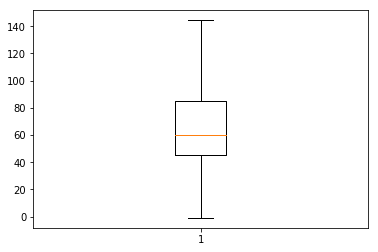

In [24]:
plt.boxplot(dfx['S1'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f1b3ec0aef0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1b3ebb85c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1b3ec0ada0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f1b3ebb8c50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f1b3ebb8f98>],
 'means': []}

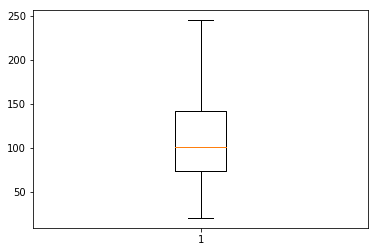

In [25]:
plt.boxplot(dfx['S2'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f1b3eb8b3c8>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1b3eb8ba58>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1b3eb8b278>],
 'medians': [<matplotlib.lines.Line2D at 0x7f1b3eb14128>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f1b3eb14470>],
 'means': []}

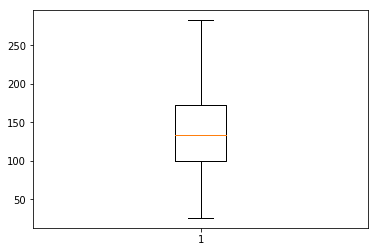

In [26]:
plt.boxplot(dfx['S3'])

In [27]:
# concat dfx dataframe and dfc2 dataframe to create the full x-variable dataframe 
dfx = pd.concat([dfx, dfc2], axis=1)
dfx.head()

,C1,C3,C4,C5,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3,C3p,C5p,C6p,C2
0,122.000,2.625,0.029074,40962052.0,10600000.0,51.345,470.0,12719.0,11560.0,301.0,690.0,62.0,117.0,139.0,0,3.864345,11.111111,1.0
1,254.375,-1.620,-0.013352,28869196.0,2400000.0,25.936,791.0,21792.0,19585.0,510.0,1120.0,71.0,242.0,237.0,1,7.882541,0.000000,0.0
2,90.000,-1.240,0.020715,16845668.0,5000000.0,7.378,201.0,5262.0,4785.0,128.0,325.0,61.0,33.0,60.0,1,3.369134,0.000000,1.0
3,209.000,-0.910,0.020023,14848637.0,4500000.0,8.526,328.0,8259.0,7574.0,177.0,509.0,80.0,59.0,110.0,1,3.299697,0.000000,1.0
4,80.000,0.070,-0.034895,30741716.0,8250000.0,632.298,572.0,14830.0,13176.0,336.0,720.0,67.0,149.0,167.0,0,3.726269,5.000000,1.0


In [28]:
# export the new csv file to use in normalization 
dfx.to_csv('csv_files/p1iqr.csv')